# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. В данном исследовании установим рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
-`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
-`balcony` — число балконов
-`ceiling_height` — высота потолков (м)
-`cityCenters_nearest` — расстояние до центра города (м)
-`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
-`first_day_exposition` — дата публикации
-`floor` — этаж
-`floors_total` — всего этажей в доме
-`is_apartment` — апартаменты (булев тип)
-`kitchen_area` — площадь кухни в квадратных метрах (м²)
-`last_price` — цена на момент снятия с публикации
-`living_area` — жилая площадь в квадратных метрах (м²)
-`locality_name` — название населённого пункта
-`open_plan` — свободная планировка (булев тип)
-`parks_around3000` — число парков в радиусе 3 км
-`parks_nearest` — расстояние до ближайшего парка (м)
-`ponds_around3000` — число водоёмов в радиусе 3 км
-`ponds_nearest` — расстояние до ближайшего водоёма (м)
-`rooms` — число комнат
-`studio` — квартира-студия (булев тип)
-`total_area` — общая площадь квартиры в квадратных метрах (м²)
-`total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [79]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

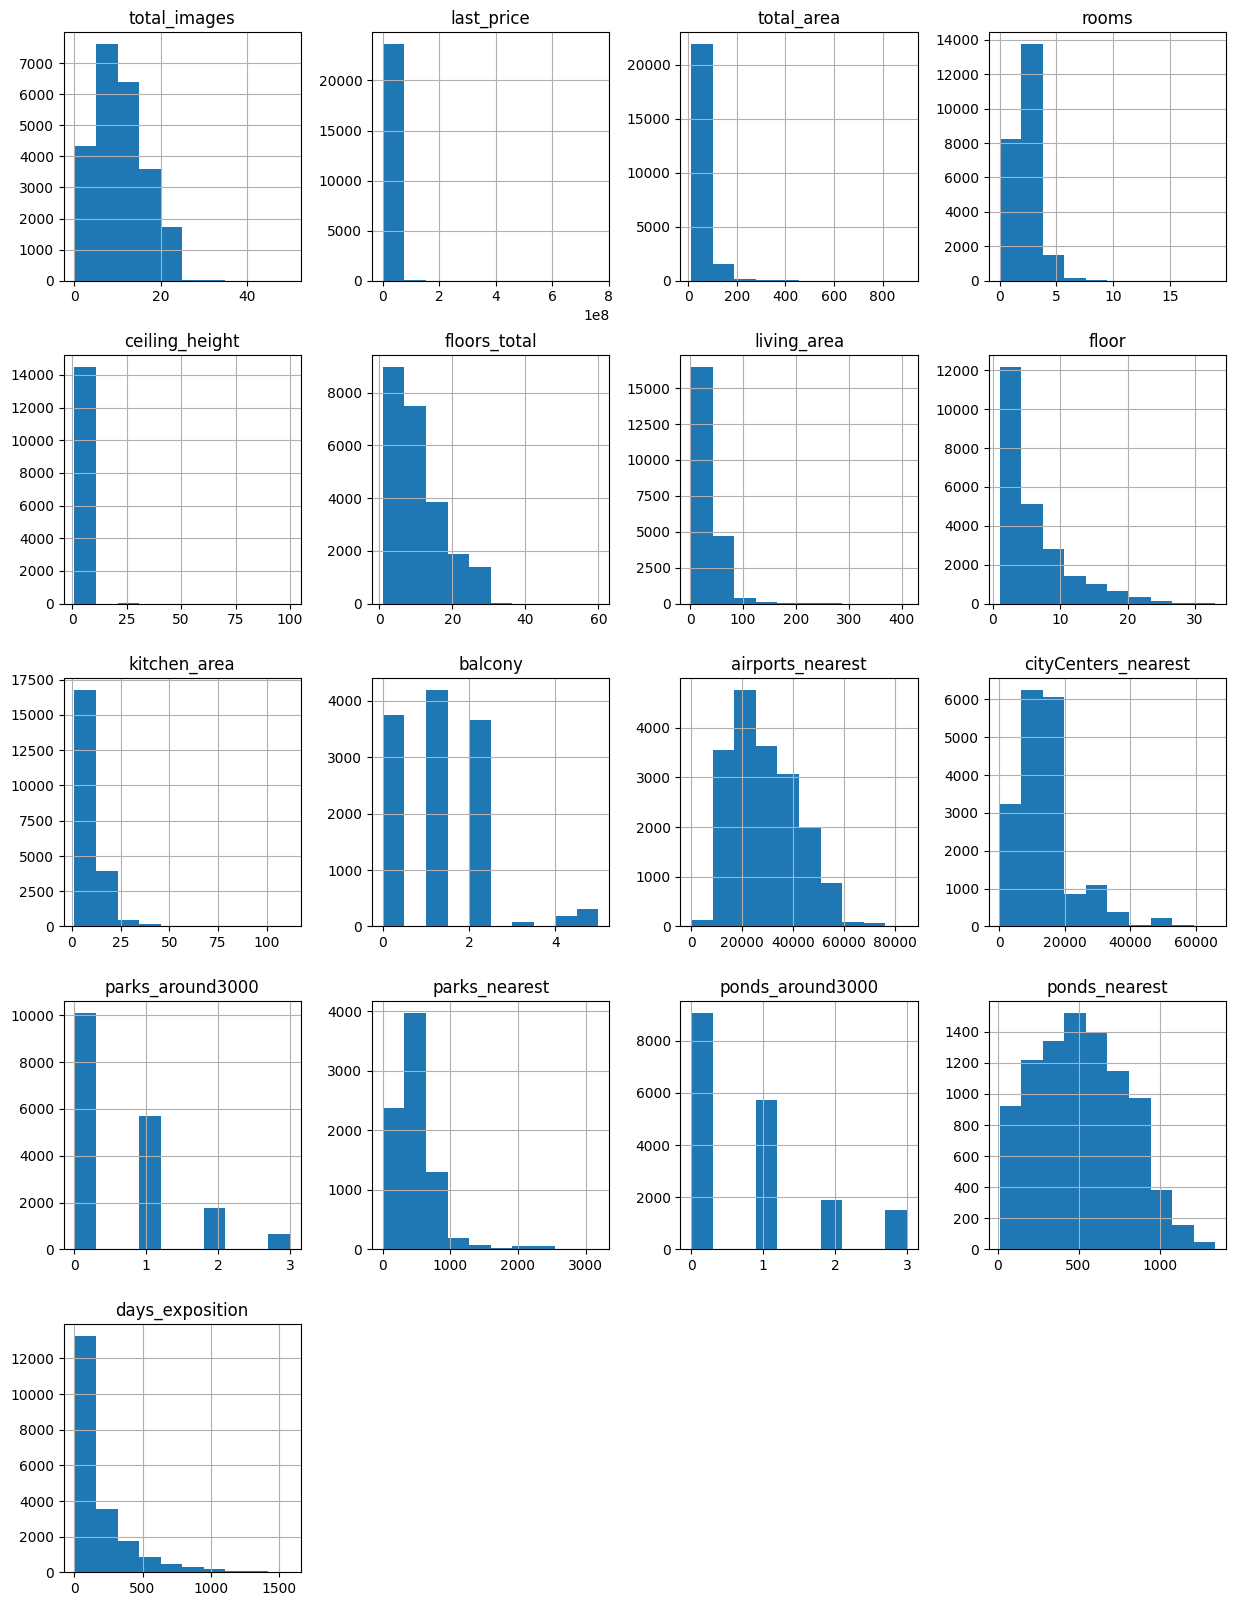

In [81]:
data.hist(figsize=(15, 20), bins=10 )
plt.show()

In [82]:
#применю функцию set_opinion, чтобы видеть данные целиком
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проверим данные на предмет явных дубликатов

In [83]:
data.duplicated().sum()

0

Дубликатов нет, можно приступать к дальнейшей предобработке данных.

### Предобработка данных

Определим количество пропусков по столбцам

In [84]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Столбец `first_day_exposition`

first_day_exposition имеет тип object. Нужно столбец преобразовать к формату datetime.

In [85]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'],
    format='%Y-%m-%dT%H:%M:%S')

#### Столбец `ceiling_height`

In [86]:
data['ceiling_height'].isna().sum()

9195

Попробуем найти какие-нибудь связи

In [87]:
data[data['ceiling_height'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27,2,NaN,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23,1,NaN,6.0,17.00,1,NaN,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0


Закономерностей не вижу. Стоит взглянуть на высоты потолков в разрезе диаграммы размаха.

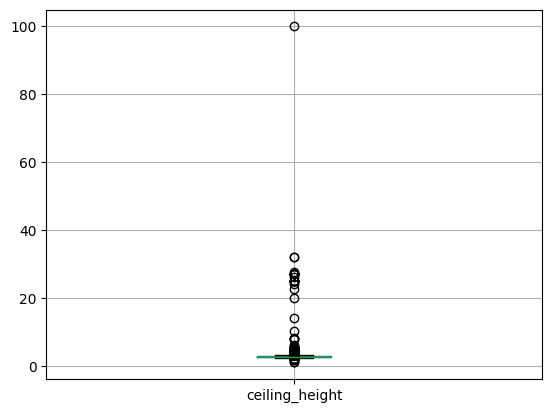

In [88]:
data.boxplot(column='ceiling_height')
plt.show()

Виднеются выбросы, особенно выделяется значение 100. Взглянем на график поближе к медиане.

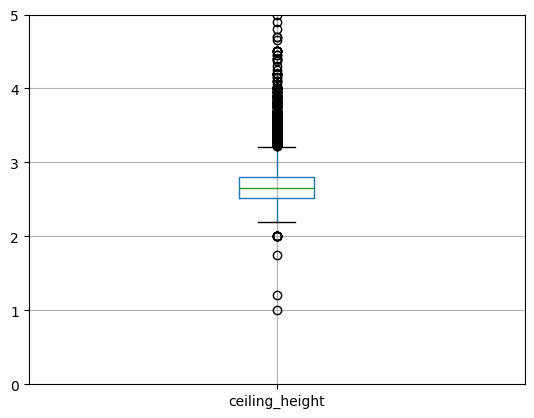

In [89]:
plt.ylim(0, 5)
data.boxplot(column='ceiling_height')
plt.show()

Определим медианную:

In [90]:
data['ceiling_height'].median()

2.65

Заполним пустые значения медианной


In [91]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Есть аномально высокие и низкие значения, рассмотрим их.

In [92]:
data.query('ceiling_height < 2 | ceiling_height > 19').sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
17496,15,6700000.0,92.9,2019-02-19,3,20.00,17.0,53.2,14,NaN,False,False,12.00,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20507,12,5950000.0,60.0,2018-02-19,2,22.60,14.0,35.0,11,NaN,False,False,13.00,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
5076,0,3850000.0,30.5,2018-10-03,1,24.00,5.0,19.5,1,True,False,False,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
355,17,3600000.0,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
18545,6,3750000.0,43.0,2019-03-18,2,25.00,5.0,29.0,3,False,False,False,NaN,NaN,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0
14382,9,1700000.0,35.0,2015-12-04,1,25.00,5.0,20.0,2,False,False,False,8.00,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0
9379,5,3950000.0,42.0,2017-03-26,3,25.00,5.0,30.0,2,NaN,False,False,5.20,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [93]:
print(f"Доля аномальных значений в столбце ceiling_height: {data.query('ceiling_height < 2 | ceiling_height > 19').shape[0] / data.shape[0]:.2%}")

Доля аномальных значений в столбце ceiling_height: 0.11%


Уберем значения меньше 2 и равную 100: слишком неправдоподобно выглядят такие параметры и их доля очень мала.

In [94]:
data = data.query('2 <= ceiling_height < 100')

Преобразуем остальные аномалии: те числа, где высота потолков больше 20 метров, делим на 10.

In [95]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10

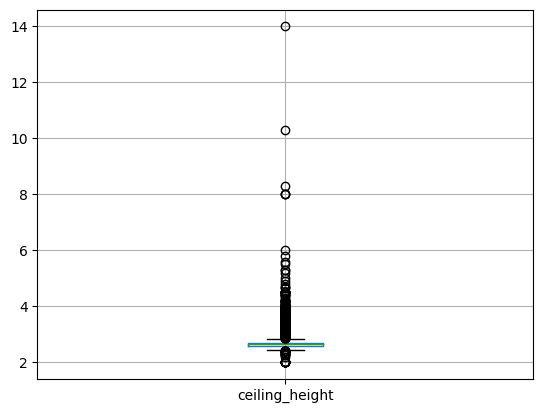

In [96]:
data.boxplot(column='ceiling_height')
plt.show()

Рассмотрим выбросы на этой диаграмме:

In [97]:
data.query('ceiling_height > 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.4,5,NaN,False,False,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,NaN,False,False,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,NaN,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,NaN,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


Всего 6 позиций: такое маленькое количество навряд ли повлияет на общие выводы.

#### Столбец `floors_total`

In [98]:
data['floors_total'].isna().sum()

86

In [99]:
data[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13,2,2.65,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29,2,2.65,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21,1,2.65,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23,1,2.65,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27,2,2.65,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Природу этих пропусков объяснить сложно. Нужно понять что с ними делать - заполнить номером этажа, который указан в floor, или удалить. Проверим количество "последних" этажей:

In [100]:
data[data['floors_total'] == data['floor']].shape[0]

3360

Можно смело заполнять пропуски значением из `floor` - 86 квартир слабо повлияют на выборку из 3360 в дальнейших исследованиях:

In [101]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

Следует поменять тип данных, т.к. они предполагают целочисленные значения

In [102]:
data['floors_total'] = data['floors_total'].astype('int')

#### Столбец `living_area`

In [103]:
data['living_area'].isna().sum()

1903

Жилая площадь, как правило, коррелирует с комнатностью квартир. Построем гистограмму, чтобы наглядно посмотреть на данную зависимость:

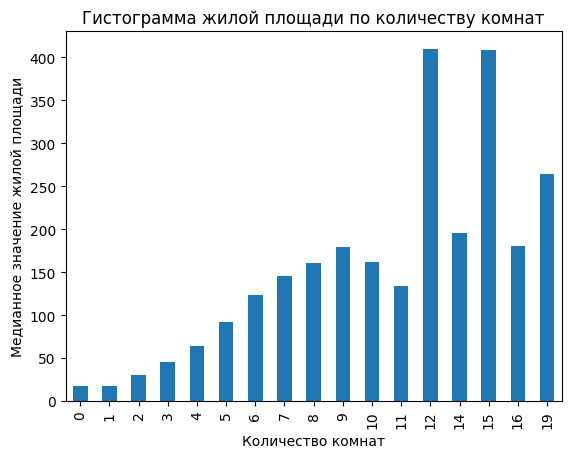

In [104]:
# Группируем данные по количеству комнат и вычисляем медиану
median_by_room_count = data.groupby('rooms')['living_area'].median()

# Строим гистограмму
median_by_room_count.plot(kind='bar',
                          xlabel='Количество комнат',
                          ylabel='Медианное значение жилой площади',
                          title='Гистограмма жилой площади по количеству комнат')

plt.show()

Корреляция прослеживается. Следует заполнить пустые ячейки медианными значениями, принимая во внимание количество комнат.

In [105]:
for count in data['rooms'].unique():
    data.loc[(data['rooms'] == count) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == count), 'living_area'].median()

#### Столбец `kitchen_area`

In [106]:
data['kitchen_area'].isna().sum()

2278

In [107]:
data[data['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19,1,2.65,9,17.6,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5,30.5,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,2.65,22,17.6,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06,1,2.65,13,17.6,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


Есть идея, что владельцы студий и квартир со свободной планировкой не указывали площадь кухни

In [108]:
try:
    if (
        data.query('studio==True | open_plan==True').shape[0] == \
        data.query('(studio==True | open_plan==True) & kitchen_area.isna()').shape[0]
        ):
            display('Все владельцы студий и квартир со свободной планировкой не указали площадь кухни')
except:
    pass

'Все владельцы студий и квартир со свободной планировкой не указали площадь кухни'

Присвоим таким кухням значение ноль, т.к. в данном случае они не являются отдельным помещением.

In [109]:
data.loc[(
    (data['studio']==True) | \
    (data['open_plan']==True)) & \
    (data['kitchen_area'].isna())
    , 'kitchen_area'] = 0

In [110]:
data['kitchen_area'].isna().sum()

2062

Остальные пропуски оставим как есть, т.к. природа их появления не ясна.

#### Столбец `is_apartment`

In [111]:
data['is_apartment'].isna().sum()

20921

Слишком много пропусков. Посчитаем процент заполняемости данного пункта

In [112]:
data['is_apartment'].count() / (data['is_apartment'].shape[0]) * 100

11.707111204895547

Является ли квартира аппартаментами или нет указано в 11% от всех объявлений. Такой маленький процент обусловлен тем, что люди понятия не имеют, относится ли их недвижимость к данной категории. Я бы удалил этот столбец, т.к. он никак не повлияет на итоговые выводы.

In [113]:
data = data.drop('is_apartment', axis=1)

#### Столбец `balcony`

Продавец не указал число балконов - скорее всего, в квартире их нет. Такие пропуски правильно заменить на 0.

In [114]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

#### Столбец `locality_name`

In [115]:
data['locality_name'].isna().sum()

49

Всего 49 квартир не имеют своей локации. Удалим эти данные.

In [116]:
data = data.dropna(subset='locality_name').reset_index(drop=True)

Создадим список населенных пунктов и отсортируем его для удобства анализа

In [117]:
locality_name_list = list(data['locality_name'].unique())
locality_name_list.sort()
locality_name_list

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Приведем к единому стандарту типы поселений (напр. все поселки будут начинаться с "поселок...")

In [118]:
data['locality_name'] = data['locality_name'].replace(
    ['посёлок',
     'городской поселок',
     'городской посёлок',
     'коттеджный поселок',
     'коттеджный посёлок',
     'поселок городского типа',
     'посёлок городского типа'], 'поселок', regex=True).replace(
    'садоводческое некоммерческое товарищество', 'садовое товарищество')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что поработал с неявными дубликатами

In [119]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
studio                      0
open_plan                   0
kitchen_area             2053
balcony                     0
locality_name               0
airports_nearest         5533
cityCenters_nearest      5510
parks_around3000         5509
parks_nearest           15584
ponds_around3000         5509
ponds_nearest           14564
days_exposition          3180
dtype: int64

#### Столбец `airports_nearest`

In [120]:
data['airports_nearest'].isna().sum()

5533

In [121]:
data['airports_nearest'].describe()

count    18113.000000
mean     28803.207199
std      12638.016812
min          0.000000
25%      18575.000000
50%      26756.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Пропуски заполним медианными расстояниями от каждого населенного пункта до аэропорта

In [122]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].median()

Удалим квартиру со значением 0: навряд ли квартира может находится на территории Пулково.

In [123]:
data = data.query('airports_nearest != 0')

In [124]:
data['airports_nearest'].isna().sum()

4863

Судя по оставшимся пропускам объявления из некоторых населенных пунктов в принципе не содержат такой информации - данный параметр (расстояние до Пулково) в данных локациях не играет большого значения. Пропуски оставляем.

#### Столбец `cityCenters_nearest`

Название столбца следует привести к змеинному регистру согласно правилам хорошего стиля

In [125]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) 

In [126]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Определим количество пустот

In [127]:
data['city_centers_nearest'].isna().sum()

5510

Заполнять пустые значения в данном столбце медианой будет неверным решением - данный показатель имеет прямое влияние на цену квартиры.

#### Столбец `days_exposition`

Пропуски в столбце говорят о том, что квартиры еще не сняты с продажи - следовательно, продаются. Трогать столбец не стоит.

#### Столбцы `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`

Данные столбцы имеют картографический характер, пропуски в них могут быть вызваны разными как техническим (отсутствие соответствующего поля для заполнения) так и человеческим (мог просто забыть или проигнорировать) факторами.

***Вывод:***
- Преобразовали столбец `first_day_exposition` к правильному формату datetime
- Заполнили медаиной пропуски в `ceiling_height`
- Для пропусков в `floors_total` использовали значения из `floor`
- Пропуски в `living_area` заполнили медианными значениями с учетом комнатности квартир
- Квартирам со свободной планировкой и "студиям", имеющие пропуски в `kitchen_area`, заполнили данный столбец нулем. Остальные пропуски не трогали, т.к. их природа не ясна
- Столбец `is_apartment` был удален, т.к. никакой полезной информации в рамках исследований для нас он не нес
- Пропуски в `balcony` скорее всего обусловлены отсутствием балконов, поэтому разумным решением было заполнить пустоты нулем
- Квартиры с пропусками в `locality_name` были удалены из данных, т.к. локация их неясна и их параметры могли бы как-то повлиять на исследования.
- `airports_nearest` - единственный столбец, имеющий картографический характер, с которым проводилась предобработка: аэропорт, в отличии от парков и прудов, один, поэтому можно было заполнить пустоты  медианой расстояния до Пулково от каждого населенного пункта. Оставшиеся же пропуски не трогали.
- Кроме причины выше, почему столбцы `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` не подверглись предобработке, еще можно счиатать человеческий и технический факторы, из-за которых образовалсиь пропуски.
- Пропуски в `days_exposition` несут в себе информацию о том, что квартира не снята с продажи - заполнять их не надо.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим новые столбцы в данные:
- Цену за кв. метр
- День недели, месяц и год
- Тип этажа

Также переведем в км расстояние до центра

In [130]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).astype('int') #цена за квадратный метр

data['weekday'] = data['first_day_exposition'].dt.weekday #день подачи объявления

data['month'] = data['first_day_exposition'].dt.month #месяц подачи объявления

data['year'] = data['first_day_exposition'].dt.year #год подачи объявления

def floor_type(floor, floors_total): #тип этажа квартиры(первый, последний, другой)
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        pass
    
data['floor_type'] = data.apply(lambda x: floor_type(x['floor'], x['floors_total']), axis=1)

data['city_centers_nearest'] = (data['city_centers_nearest'] / 1000).round() #перевод в км

Посмотрим на добавленные столбцы

In [131]:
data[['price_square_meter', 'weekday', 'month', 'year', 'floor_type', 'city_centers_nearest']].head()

,price_square_meter,weekday,month,year,floor_type,city_centers_nearest
0,120370,3,3,2019,другой,0.0
1,82920,1,12,2018,первый,0.0
2,92785,3,8,2015,другой,0.0
3,408176,4,7,2015,другой,0.0
4,100000,1,6,2018,другой,0.0


Поправлю weekday, прибавив 1 для более понятного восприятия значений столбца 

In [132]:
data['weekday'] = data['weekday'] + 1

In [133]:
data[['price_square_meter', 'weekday', 'month', 'year', 'floor_type', 'city_centers_nearest']].head()

,price_square_meter,weekday,month,year,floor_type,city_centers_nearest
0,120370,4,3,2019,другой,0.0
1,82920,2,12,2018,первый,0.0
2,92785,4,8,2015,другой,0.0
3,408176,5,7,2015,другой,0.0
4,100000,2,6,2018,другой,0.0


### Проведите исследовательский анализ данных

#### Общая площадь

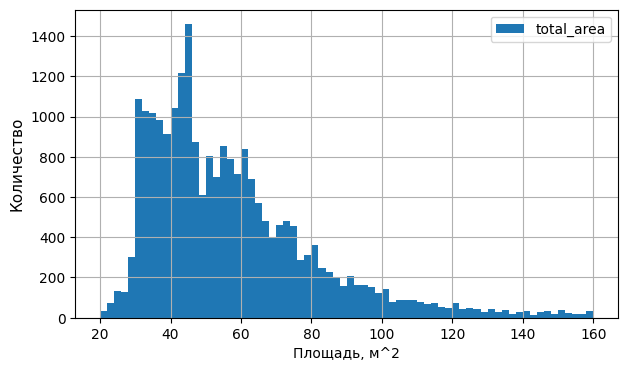

count    23645.000000
mean        60.333474
std         35.664005
min         12.000000
25%         40.000000
50%         52.000000
75%         69.710000
max        900.000000
Name: total_area, dtype: float64

In [134]:
data.plot(
    y='total_area',
    kind='hist',
    bins=70,
    grid=True,
    figsize=(7, 4),
    range=(20, 160))

plt.xlabel('Площадь, м^2')
plt.ylabel('Количество', fontsize=11)
plt.show()

data['total_area'].describe()

 ***Вывод:*** Судя по графику, основным предложением являются квартиры площадью 30-46 "метров". Стандартное отклонение 35м говорит о том, что значения в этом столбце неоднородны. Длинный хвост свидетельствует о сокращении предложений с ростом площади квартир.

#### Жилая площадь

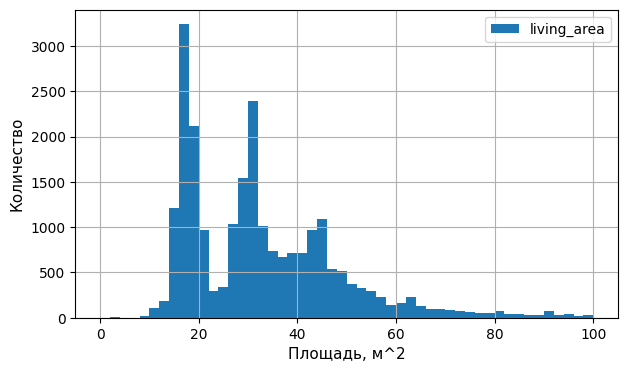

count    23645.000000
mean        34.315679
std         21.709825
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

In [135]:
data.plot(
    y='living_area',
    kind='hist',
    bins=50,
    grid=True,
    figsize=(7, 4),
    range=(0, 100))

plt.xlabel('Площадь, м^2', fontsize=11)
plt.ylabel('Количество', fontsize=11)
plt.show()

data['living_area'].describe()

Видно несколько пиков, стоит посмотреть на этот график в контексте комнатности квартир.

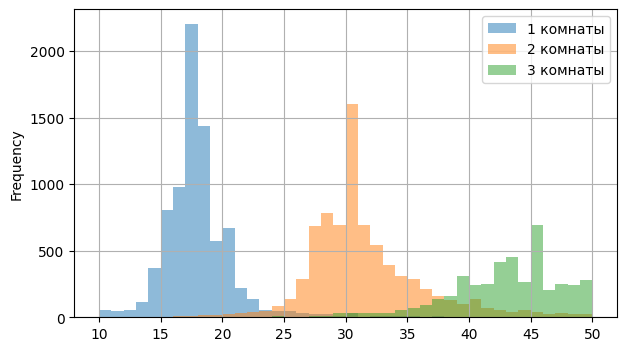

In [138]:
def plot_histogram(data, room_count, ax, label):
    data.query(f'rooms == {room_count}').plot(
        y='living_area',
        kind='hist',
        bins=40,
        grid=True,
        figsize=(7, 4),
        range=(10, 50),
        ax=ax,
        label=label,  # Передаем значение label как аргумент функции
        alpha=0.5
    )

ax = None
for room_count in [1, 2, 3]:
    if ax is None:
        ax = plt.gca()  # Получаем текущую активную ось
    plot_histogram(data, room_count, ax, label=f'{room_count} комнаты')

plt.legend()
plt.show()

***Вывод:*** Наблюдаются три пика по предложениям - 17, 30 и 45 "метров", что соответствуют "однушкам", "двушкам" и "трешкам".

#### Кухонная площадь

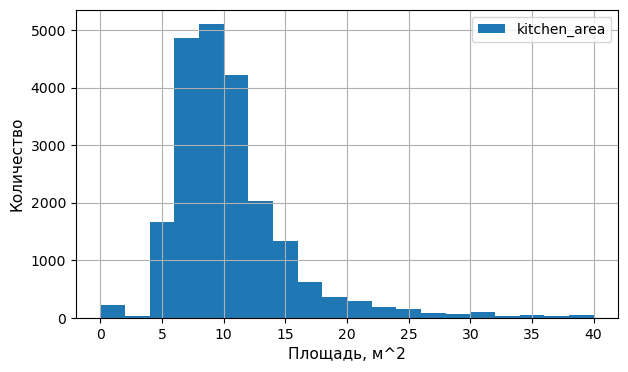

count    21592.000000
mean        10.461269
std          5.966041
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [241]:
data.plot(
    y='kitchen_area',
    kind='hist',
    bins=20,
    grid=True,
    figsize=(7, 4),
    range=(0, 40))

plt.xlabel('Площадь, м^2', fontsize=11)
plt.ylabel('Количество', fontsize=11)
plt.show()

data['kitchen_area'].describe()

***Вывод:*** Медиана - 9 "метров". Данный показатель также является самым частым в объявлениях.

#### Цена недвижимости

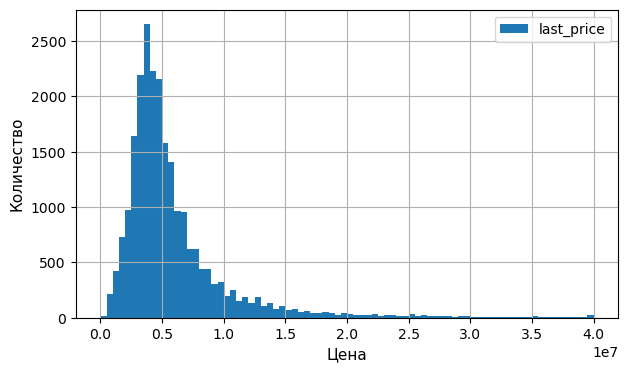

count    2.364500e+04
mean     6.541089e+06
std      1.089735e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [242]:
data.plot(
    y='last_price',
    kind='hist',
    bins=80,
    grid=True, 
    figsize=(7, 4),
    range=(0, 40000000))

plt.xlabel('Цена', fontsize=11)
plt.ylabel('Количество', fontsize=11)
plt.show()

data['last_price'].describe()

***Вывод:*** Пик предложений приходится на сумму около 4 млн.

#### Количество комнат

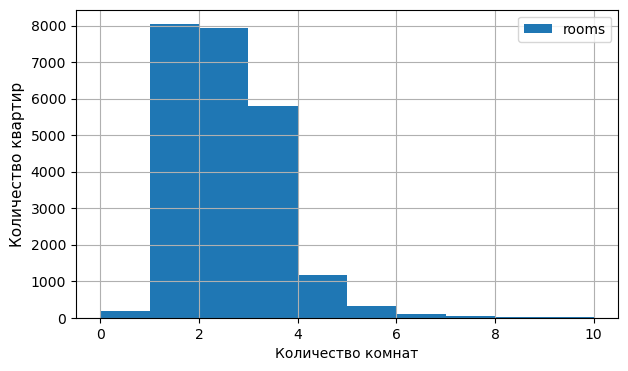

count    23645.000000
mean         2.070247
std          1.078667
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [243]:
data.plot(
    y='rooms',
    kind='hist',
    bins=10,
    grid=True, 
    figsize=(7, 4),
    range=(0,10))

plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

data['rooms'].describe()

In [244]:
print('Доля квартир с 1-3 комнатами:', round(data.query('rooms <= 3').shape[0] / data.shape[0] * 100, 2),'%')

Доля квартир с 1-3 комнатами: 92.83 %


***Вывод:*** Львиная доля высталвенных на продажу квартир имеют по 1-3 комнаты.

#### Высота потолков

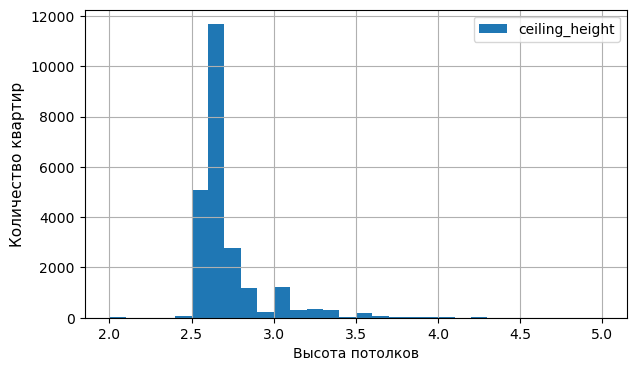

count    23645.000000
mean         2.698486
std          0.248223
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [245]:
data.plot(
    y='ceiling_height',
    kind='hist',
    bins=30,
    grid=True, 
    figsize=(7, 4),
    range=(2, 5))

plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

data['ceiling_height'].describe()

***Вывод:*** Основная доля квартир на продаже имеет высоту потолков 2.6-2.7 метров.

#### Этаж квартиры

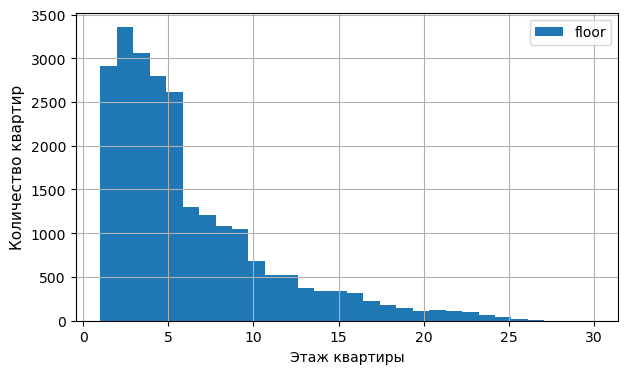

count    23645.000000
mean         5.893635
std          4.883681
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [267]:
data.plot(
    y='floor',
    kind='hist',
    bins=30,
    grid=True, 
    figsize=(7, 4),
    range=(1,30))

plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

data['floor'].describe()

***Вывод:*** Основная доля продающихся квартир расположены на 1-5 этажах.

#### Тип этажа квартиры

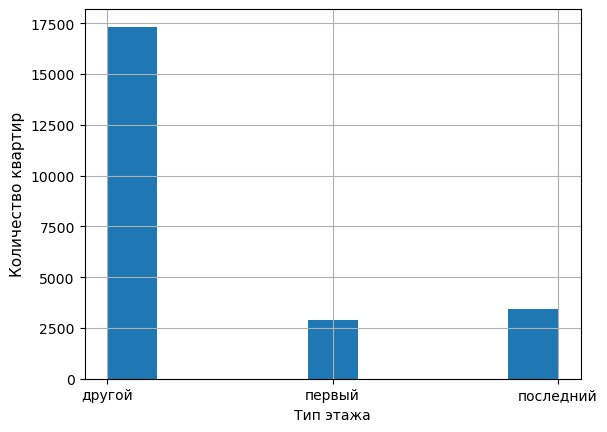

count      23645
unique         3
top       другой
freq       17323
Name: floor_type, dtype: object

In [247]:
data['floor_type'].hist(bins=9)

plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

data['floor_type'].describe()

***Вывод:*** Тип этажа "другой", т.е. не "первый" и не "последний", встречается чаще всего - 17323 раза.

#### Общее количество этажей в доме

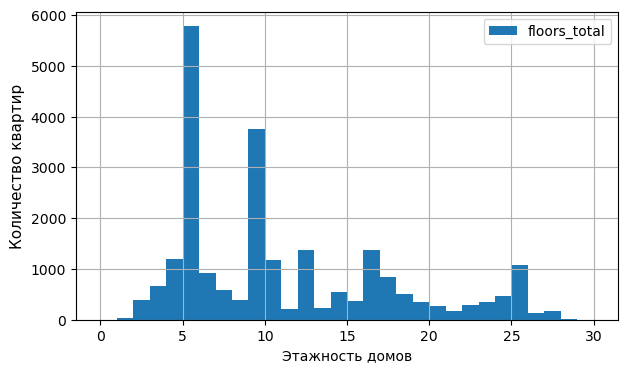

count    23645.000000
mean        10.673292
std          6.591570
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [248]:
data.plot(
    y='floors_total',
    kind='hist',
    bins=30,
    grid=True, 
    figsize=(7, 4),
    range=(0, 30))

plt.xlabel('Этажность домов')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

data['floors_total'].describe()

***Вывод:*** На графике видно два пика: 5 и 9 этажей. Типичная этажность многоквартирных домов для России, Санкт-Петербург и "область" тут не исключение.

#### Расстояние до центра города

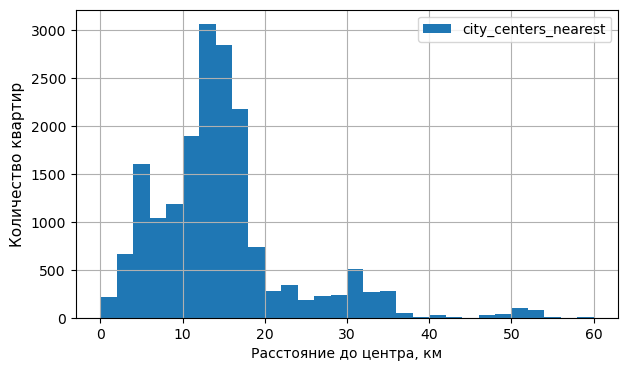

count    18135.000000
mean        14.191122
std          8.615116
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

In [249]:
data.plot(
    y='city_centers_nearest',
    kind='hist',
    bins=30,
    grid=True, 
    figsize=(7, 4),
    range=(0, 60))

plt.xlabel('Расстояние до центра, км')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

data['city_centers_nearest'].describe()

***Вывод:*** среднее расстояние - 14 км, медиана - 13. Примерно эти цифры и являются самыми распространенными в объявлениях.

#### Расстояние до ближайшего аэропорта

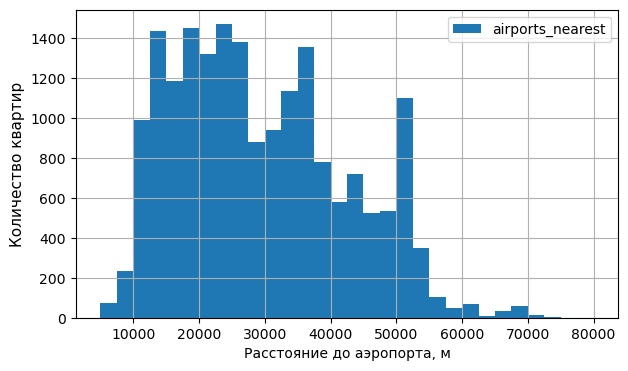

count    18782.000000
mean     29505.527180
std      13045.791106
min       6450.000000
25%      18794.000000
50%      27179.000000
75%      38622.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [250]:
data.plot(
    y='airports_nearest',
    kind='hist',
    bins=30,
    grid=True, 
    figsize=(7, 4),
    range=(5000, 80000))

plt.xlabel('Расстояние до аэропорта, м')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

data['airports_nearest'].describe()

***Вывод:*** Основная часть квартир находится от Пулково на расстоянии в 10000-38000 м.

#### Расстояние до ближайшего парка

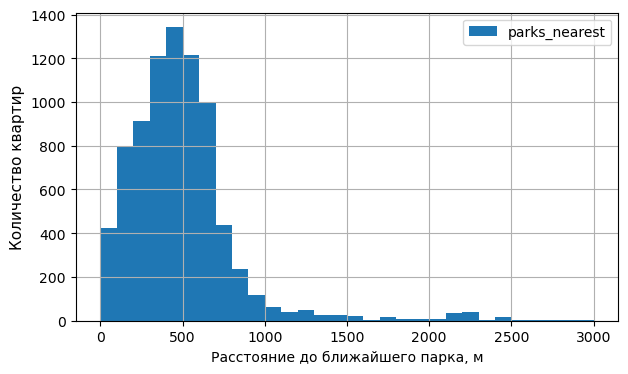

count    8062.000000
mean      490.888489
std       342.576800
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [251]:
data.plot(
    y='parks_nearest',
    kind='hist',
    bins=30,
    grid=True, 
    figsize=(7, 4),
    range=(0, 3000))

plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

data['parks_nearest'].describe()

***Вывод:*** Основная часть квартир находится на расстоянии до 700 метров от ближайшего парка. Чаще всего - 400-500 метров.

#### День и месяц публикации объявления

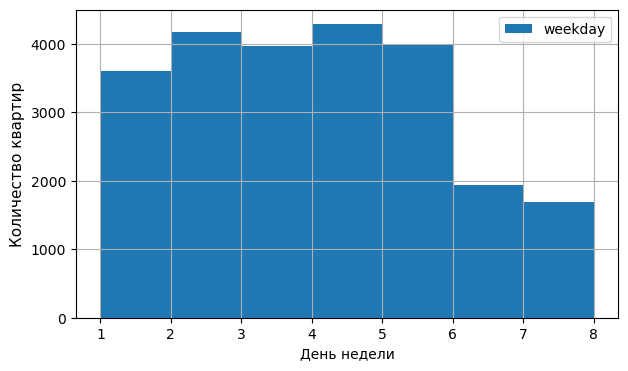

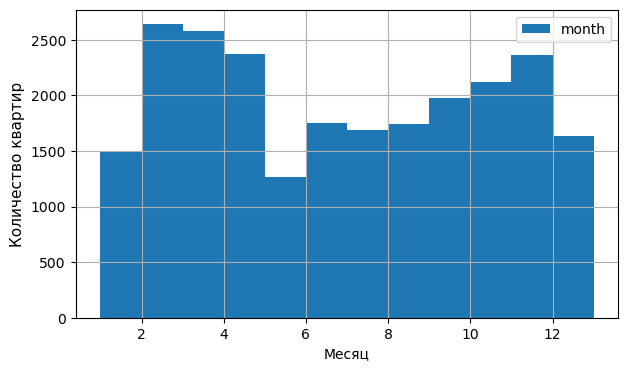

In [252]:
data.plot(
    y='weekday',
    kind='hist',
    bins=7,
    grid=True, 
    figsize=(7, 4),
    range=(1, 8))

plt.xlabel('День недели')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

data.plot(
    y='month',
    kind='hist',
    bins=12,
    grid=True, 
    figsize=(7, 4),
    range=(1, 13))

plt.xlabel('Месяц')
plt.ylabel('Количество квартир', fontsize=11)
plt.show()

***Вывод:*** Квартиры выставляют на продажу в будние дни чаще чем в выходные примерно в два раза. На месячной гистограмме можно выделить сезоны: самая большая активность - февраль-апрель, затем майский спад (подготовка к отпускам) и постепенный рост вплоть до ноября, потом опять спад, в этот раз новогодний.

### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

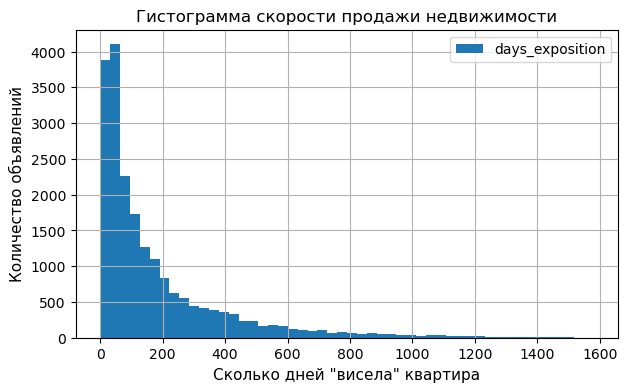

count    20465.000000
mean       180.777278
std        219.795263
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [253]:
data.plot(
    y='days_exposition',
    kind='hist',
    bins=50,
    grid=True,
    figsize=(7, 4),
    )

plt.xlabel('Сколько дней "висела" квартира', fontsize=11)
plt.ylabel('Количество объявлений', fontsize=11)
plt.title('Гистограмма скорости продажи недвижимости')
plt.show()

data['days_exposition'].describe()

***Вывод:*** Медианное значение - 95 дней, среднее - 180. Такой разброс в значениях объясняется выбросами - квартирами, которые висели годами перед снятием с продажи. Поэтому обычным сроком продажи лучше считать медиану. "Быстрой" продажей можно обозначить снятие объявления в срок до 45 дней (1-й квартиль), "долгой" - после 231 дня (3-й квартиль).

### Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

#### Зависимость цены от общей площади

Найдем коэффициент корреляции Пирсона

In [254]:
data['last_price'].corr(data['total_area'])

0.6538022592445826

Построим диаграмму

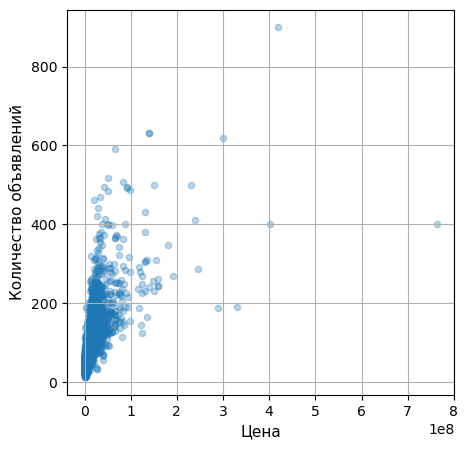

In [255]:
data.plot(kind='scatter', 
          x='last_price', 
          y='total_area',  
          figsize=(5, 5),
          grid=True,
          alpha=0.3)

plt.xlabel('Цена', fontsize=11)
plt.ylabel('Количество объявлений', fontsize=11)
plt.show()

***Вывод:*** На диаграмме рассеивания видно: цена зависит от общей площади, что также подтверждается и коэффициентом Пирсона.

#### Зависимость цены от жилой площади

Найдем коэффициент корреляции Пирсона

In [256]:
data['last_price'].corr(data['living_area'])

0.55620090272783

Построим диаграмму

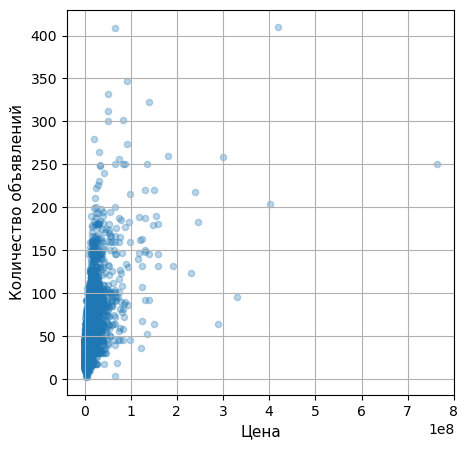

In [257]:
data.plot(kind='scatter', 
          x='last_price', 
          y='living_area',  
          figsize=(5, 5),
          grid=True,
          alpha=0.3)

plt.xlabel('Цена', fontsize=11)
plt.ylabel('Количество объявлений', fontsize=11)
plt.show()

***Вывод:*** влияние жилой площади на цену меньше, чем общей, но корреляция все же прослеживается.

#### Зависимость цены от кухонной площади

Найдем коэффициент корреляции Пирсона

In [258]:
data['last_price'].corr(data['kitchen_area'])

0.5162963884119814

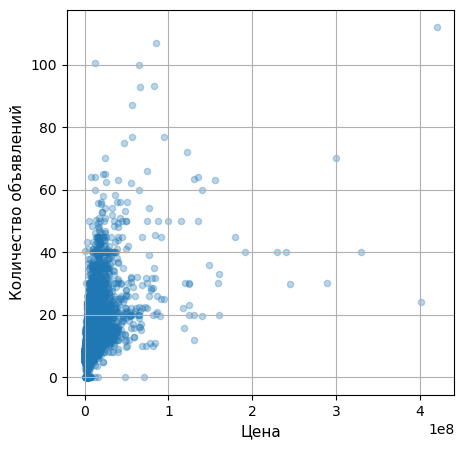

In [259]:
data.plot(kind='scatter', 
          x='last_price', 
          y='kitchen_area',  
          figsize=(5, 5),
          grid=True,
          alpha=0.3)

plt.xlabel('Цена', fontsize=11)
plt.ylabel('Количество объявлений', fontsize=11)
plt.show()

***Вывод:*** Корреляция видна на диаграмме, коэффициент Пирсона это лишь подтверждает.

#### Зависимость цены от количества комнат

<AxesSubplot:xlabel='rooms'>

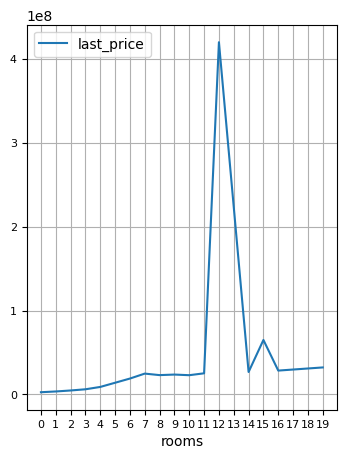

In [260]:
(data.pivot_table(
    index='rooms',
    values='last_price',
    aggfunc='median')
    .plot(
    grid=True,
    xticks=range(0,20),
    figsize=(4,5),
    fontsize=8)
)

Начиная с 12 комнатной квартиры данные искажаются. Следует узнать их долю и, если понадобится, отбросить от основной части данных.

In [261]:
data.query('rooms >= 12').shape[0]

6

Можно смело отбрасывать

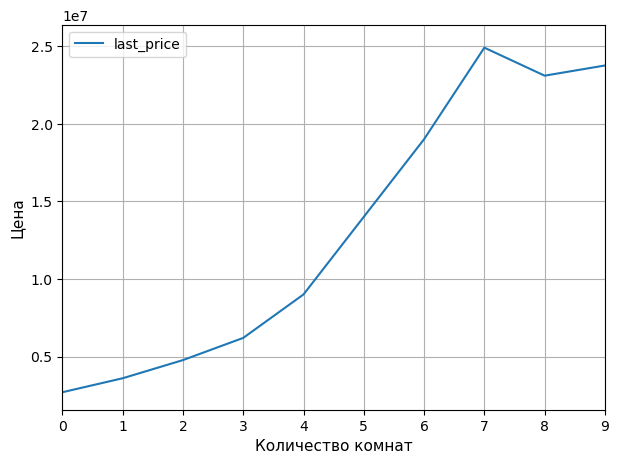

In [262]:
(
    data.
     query('rooms < 12').
     pivot_table(
        index='rooms',
        values='last_price',
        aggfunc='median')
        .plot(
            grid=True,
            figsize=(7,5),
            xlim=(0,9)
    )
)


plt.xlabel('Количество комнат', fontsize=11)
plt.ylabel('Цена', fontsize=11)
plt.show()

***Вывод:*** корреляция прослеживается: чем больше комнат, тем выше цена.

#### Зависимость цены от типа этажа

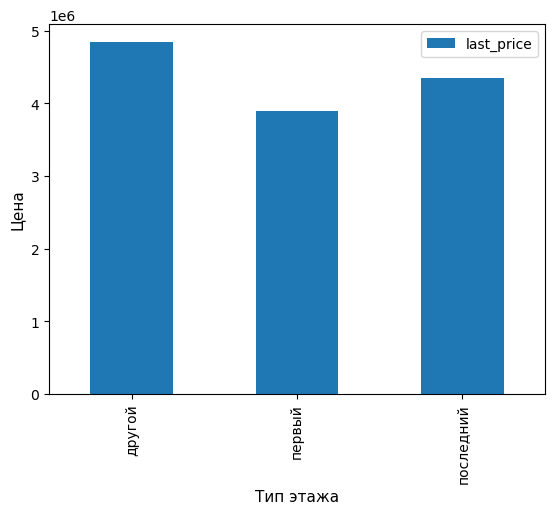

In [268]:
(
data
.pivot_table(
index='floor_type',
values='last_price',
aggfunc='median')
    .plot(
    kind='bar')
)

plt.xlabel('Тип этажа', fontsize=11)
plt.ylabel('Цена', fontsize=11)
plt.show()

***Вывод:*** Т.к. спрос на первые и последние этажи ниже, следовательно и цена ниже на квартиры такого типа

#### Зависимость цены от даты размещения

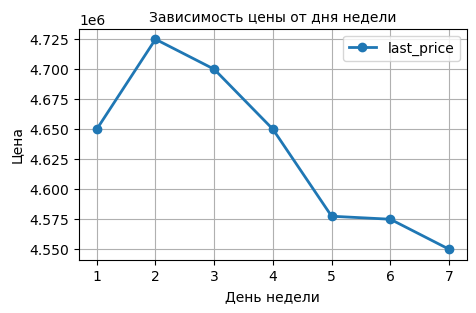

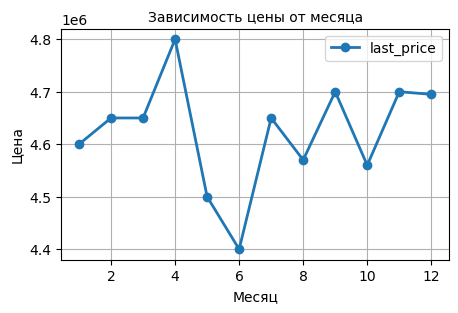

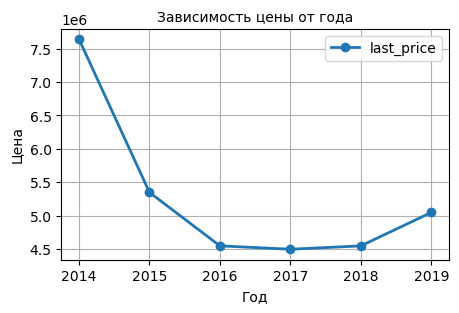

In [264]:
columns = ['weekday',
           'month',
           'year']

rows = ['День недели',
        'Месяц',
        'Год']

titles = ['Зависимость цены от дня недели', 
          'Зависимость цены от месяца', 
          'Зависимость цены от года']



count = 0
for time in columns:
    (
        data
        .pivot_table(
            index=time,
            values='last_price',
            aggfunc='median')
        .plot(y='last_price',
              xlabel=time, 
              grid=True,
              linewidth=2,
              style='o-',
              figsize=(5,3))
    )
    plt.title(titles[count], fontsize=10)
    plt.xlabel(rows[count], fontsize=10)
    plt.ylabel('Цена')
    plt.show()
    count += 1

***Вывод:***
- Разница между максимумом (вторник) и минимумом (воскресенье) несущественная. Зависимости не наблюдается, несмотря на некий нисходящий тренд от вторника до воскресенья.
- Никакой коррелиции между ценой и месяцом не наблюдается.
- Самый "дорогой" год - 2014. После - резкий спад. Данная зависимость скорее всего связана с кризисом в стране, который повлиял и на рынок недвижимости.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name

In [265]:
locality_name_pivot = (
    data.pivot_table(
        index='locality_name',
        values='price_square_meter',
        aggfunc=['mean', 'count'])
)

locality_name_pivot.columns = ['mean_price_square_meter', 'count']
locality_name_pivot = (
    locality_name_pivot.
    sort_values(
        by='count',
        ascending=False).head(10).
    sort_values(
        by='mean_price_square_meter',
        ascending=False)
)

locality_name_pivot

,mean_price_square_meter,count
locality_name,,
Санкт-Петербург,114813.321563,15717
Пушкин,103125.373984,369
деревня Кудрово,92473.086957,299
поселок Парголово,90175.489297,327
поселок Мурино,85681.305755,556
поселок Шушары,78676.904545,440
Колпино,75424.150888,338
Гатчина,68745.693811,307
Всеволожск,68654.007538,398


***Вывод:*** в 10 населённых пунктах с наибольшим числом объявлений самый дорогой "метр" оказался в Санкт-Петербурге, самый дешевый - в Выборге.

### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

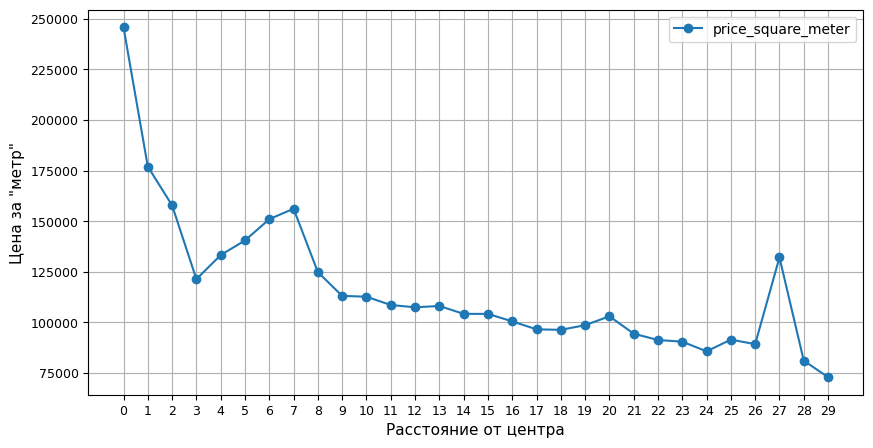

In [271]:
(
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(
    index='city_centers_nearest',
    values='price_square_meter',
    aggfunc='mean')
    .plot(
    kind='line',
    grid=True,
    style='o-',
    xticks=range(0,30,1),
    fontsize=9,
    figsize=(10,5))
)

plt.xlabel('Расстояние от центра', fontsize=11)
plt.ylabel('Цена за "метр"', fontsize=11)
plt.show()

Видна тенденция уменьшения цены по мере отдаления от центра. Если смотреть более детально, то:
- резкое падение цены почти на 50% на расстоянии от 0 до 3 км от центра
- потом рост - до 7км
- цена вновь снижается, на этот раз плавно
- имеется выброс на расстоянии в 27 км

### Общий вывод

Данные, с которыми была проведена работа - архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Исследование велось в несколько этапов:
 - Провели предобработку, заполнив пустые ячейки либо медианой, либо теми значениями, которыми обладают схожие по своим характеристикам объекты.
 - Добавили новые столбцы для более полного анализа.

Вот несколько итогов, которые можно выделить по итогам анализа данных:
1. Основная доля квартир имеет общую площадь 30-46 "метров"
2. Больше всего на рынке представлены "однушки" и "двушки" с жилой площадью 17 и 30 "метров" соответственно. Следом идут "трешки", квартиры с 4+ комнатами имеют чуть больше 7% на рынке.
3. Средний ценник на квартиры - 6.5 млн, медианная стоимость - 4
4. Средний этаж квартиры - 5. Много квартир из домов типовой застройки.
5. Первые и последние этажи встречаются примерно одинаково, но на рынке их чущественно меньше, чем тип "другой"
6. Ожидаемая картина: чаще всего продают квартиры из пяти- и девятиэтажек.
7. Больше всего объявлений на расстоянии 12 - 16 км. от центра
8. Среднее и медианное расстояния от Пулково примерно одинаковые - 29 и 27 км.
9. Три четверти квартир, у которых указано расстояние до парка, находятся в 600 метрах до ближайшего парка.
10. Чаще всего объявления выставляют в будние дни
11. Февраль-апрель - самые активные месяцы. Декабрь, январь и май: в это время меньше всего выставляют квартиры на продажу.

Квартиры продаются в основном за три месяца. Те, которые висят годами искажают статистику - средняя отличается от медианной почти в два раза - 180 дней.

Влияние определенных факторов на цену квартиры:
- Комнатность коррелирует с ценой
- Первый и последний этажи пользуются меньшим спросом, следовательно цена на них меньше.

День и месяц публикации роли не играют. Но вот в разные года цена сильно менялась. Из тех данных, что есть, 2014 год стоит особняком - в этот год были самые высокие цена. После - наступила сильная дефляция. Рост наметился лишь в 2018 и продолжился в 2019.

Самый дорогой квадратный метр: в Санкт-Петербурге - 115000.
По мере отдаления от центра стоимость "метра" уменьшается. Но естьисключение в виде участка 4-7 км: здесь цена растет, после чего вновь падает.